In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from sklearn.model_selection import train_test_split
# column transformer
from sklearn.compose import ColumnTransformer
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
# para el escalado de datos
from sklearn.preprocessing import StandardScaler


In [4]:
#carga el archivo xlsx
df = pd.read_excel('BD Prueba técnica Analista de datos.xlsx')


In [15]:
# crea un dataframe con las dos primeras columnas df['No.'], df['SalePrice'], df['YrSold']
dict_data = {'ID': df.index, 'SalePrice': df['SalePrice'], 'fecha': df['YrSold']}
dict_data = pd.DataFrame(dict_data)
dict_data



,ID,SalePrice,fecha
0,0,141592,2007
1,1,51327,2007
2,2,48672,2007
3,3,221238,2007
4,4,78318,2007
...,...,...,...
4119,4119,482300,2017
4120,4120,511504,2017
4121,4121,298230,2017
4122,4122,357522,2017


In [18]:
# safe dict_data to csv
dict_data.to_csv('dict_data.csv', index=False)
# usa os par


In [17]:
with open('dict_data.dat', 'w') as f:
    f.write(str(new_dict))


In [25]:

df.shape



(4124, 31)

In [42]:
# one hot encoding de las variables 'HallwayType' 'HeatingType' 'AptManageType' 'TimeToBusStop' 'TimeToSubway'
# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(df[['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway']])

# Obtener nombres de las columnas
encoded_columns = encoder.get_feature_names_out(['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway'])

# Convertir el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)



c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and 

In [25]:
encoded_df.head()

,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,HeatingType_central_heating,HeatingType_individual_heating,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [43]:
# Usa este DataFrame con las 4100 filas
df = pd.concat([df, encoded_df], axis=1)


In [44]:
df = df.drop(['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway'], axis=1)
df.shape

(4124, 41)

In [45]:
df = df.drop(['SubwayStation'], axis=1)


In [48]:
# buscar duplicados en el dataframe
duplicates = df.duplicated()
df[duplicates]

,No.,SalePrice,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,N_Parkinglot.Ground.,N_Parkinglot.Basement.,N_APT,...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby


In [49]:
df.head()

,No.,SalePrice,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,N_Parkinglot.Ground.,N_Parkinglot.Basement.,N_APT,...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
0,1,141592,2006,2007,8,814,3,111,184,3,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,51327,1985,2007,8,587,8,80,76,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,48672,1985,2007,8,587,6,80,76,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,221238,1993,2007,8,1761,3,523,536,8,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7,78318,1992,2007,8,644,2,142,79,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Modelo

In [31]:
# variable objetivo: 'sale price'
y = df['SalePrice']
X = df


# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df.columns[0:])
    ]
)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [34]:
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprec

In [35]:
# Evaluar el random forest
print('R2:', model.score(X_test, y_test))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


R2: 0.9999922273507028
MSE 88514.82363109753
RMSE: 297.51440911508394


c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\quint.LAPTOP-LGVR2QRN\.conda\envs\VSCode\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

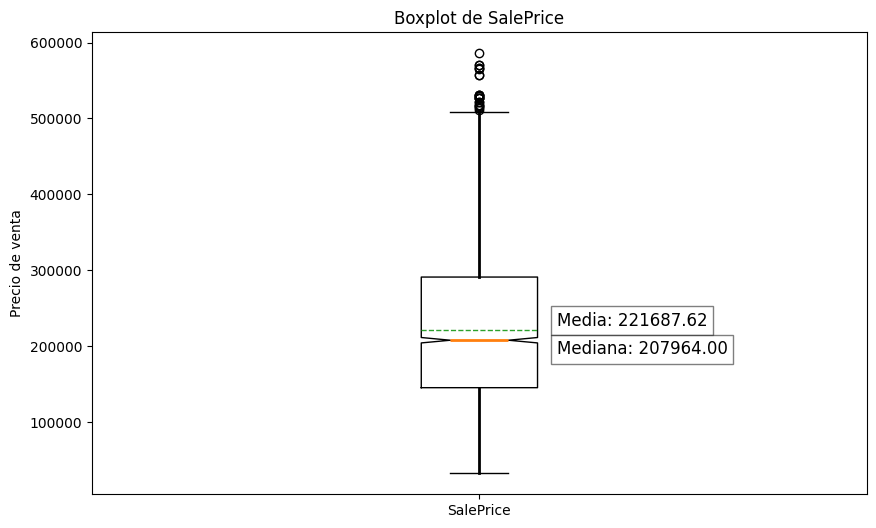

In [36]:
median_value = df['SalePrice'].median()
mean_value = df['SalePrice'].mean()
# grafico de cajas de el precio de venta
plt.figure(figsize=(10, 6))
plt.boxplot(df['SalePrice'], notch= True, showbox=True, patch_artist=False, medianprops={'linewidth': 2}, meanline=True, showmeans=True,  showcaps=True, whiskerprops={'linewidth': 2}, labels=['SalePrice'])
plt.title('Boxplot de SalePrice')
plt.ylabel('Precio de venta')
# Agregar texto para la media y la mediana
plt.text(1.1, mean_value, f'Media: {mean_value:.2f}', verticalalignment='bottom', horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.1, median_value, f'Mediana: {median_value:.2f}', verticalalignment='top', horizontalalignment='left' ,fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [37]:
#guardar el modelo 
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']